# Flight Fare Prediction 2019

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Importing the train dataset
train = pd.read_excel(r'train.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train.shape

(10683, 11)

In [5]:
# Looking at taining dataset
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# train data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# checking values of duration column
train.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
40h 20m      1
47h 40m      1
41h 20m      1
32h 55m      1
35h 20m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
'''Since very few null values are present we drop the nan rows'''
train.dropna(inplace = True)
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

In [10]:
# First we obtain day and month from Date_of_journey column and add a new column
train['Journey_day'] = pd.to_datetime(train.Date_of_Journey, format = '%d/%m/%Y').dt.day
train['Journey_month'] = pd.to_datetime(train.Date_of_Journey, format = '%d/%m/%Y').dt.month

In [11]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [12]:
train.shape

(10682, 13)

In [13]:
# We took all the necessary data from Date_of_Journey column so we drop this column
train.drop(['Date_of_Journey'], axis = 1 , inplace = True)

In [14]:
# Column Departure time is similar to date of journey so we can drop this column after taking necessary values

# Extracting hours
train['Dep_hour'] = pd.to_datetime(train.Dep_Time).dt.hour

# Extracting minutes
train['Dep_minutes'] = pd.to_datetime(train.Dep_Time).dt.minute

# Dropping Departure time
train.drop(['Dep_Time'], axis = 1, inplace = True)

train.shape

(10682, 13)

In [15]:
train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
#  Now looking at Arrival time we can extract hours and minutes since its time when plane pulls up to gate.

# Extracting hours.
train['Arrival_hour'] = pd.to_datetime(train.Arrival_Time).dt.hour

# Extracting minutes.
train['Arrival_minutes'] = pd.to_datetime(train.Arrival_Time).dt.minute

# Now we drop Arrival time.
train.drop(['Arrival_Time'], axis = 1, inplace = True)

In [17]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# Duration is diffrence between departure and arrival time.
# Also it is time taken by plane to reach destination.

# Assigning and converting duration column to list.
duration = list(train.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:       # Checking if duration contains only hour or min.
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' # Adds 0 minutes.
        else:
            duration[i] = '0h ' + duration[i]         # Adds 0 hour.
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) #Extract hours from duration.
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # Extract only minutes from duration.

In [19]:
# Adding Duration_hours and Duration_mins list to train dataframe
train['Duration_hours'] = duration_hours
train['Duration_minutes'] = duration_mins

# Now we drop Duration column.
train.drop(['Duration'], axis = 1, inplace = True)

In [20]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorical Data

In [21]:
# Airline column is nominal data.
train.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

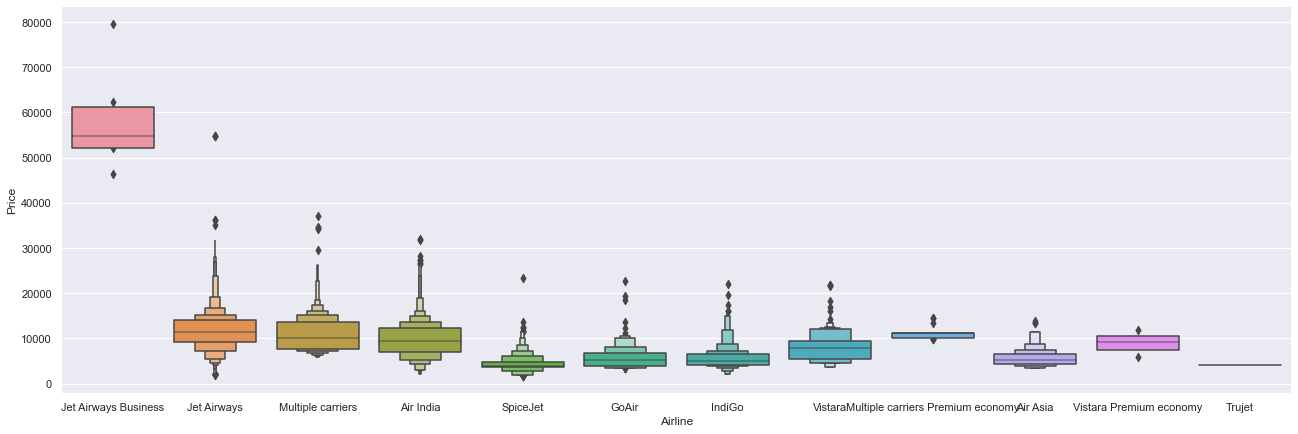

In [22]:
# From graph we can say that jet airways business has highest price rates.
# Other all are having approx. similar median.

# Airline vs Price
sns.catplot(y = 'Price', x = 'Airline', data = train.sort_values('Price', ascending = False), kind='boxen', height = 6, aspect = 3)
plt.show()

In [23]:
# As this column is nominal categorical data we performe OneHotEncoding.
Airline = train.Airline

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [24]:
# Source column is nominal data.
train.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

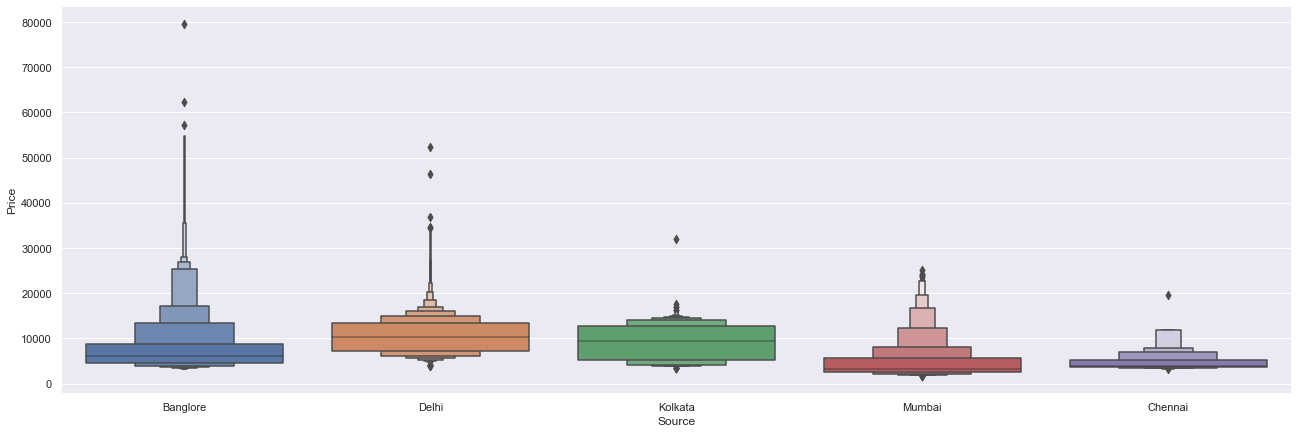

In [25]:
# Source vs Price

sns.catplot(y = 'Price', x = 'Source', data = train.sort_values('Price', ascending = False), kind='boxen', height = 6, aspect = 3)
plt.show()

In [26]:
# As this column is nominal categorical data we performe OneHotEncoding.
Source = train[['Source']]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [27]:
# Destination column is nominal data.
train.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

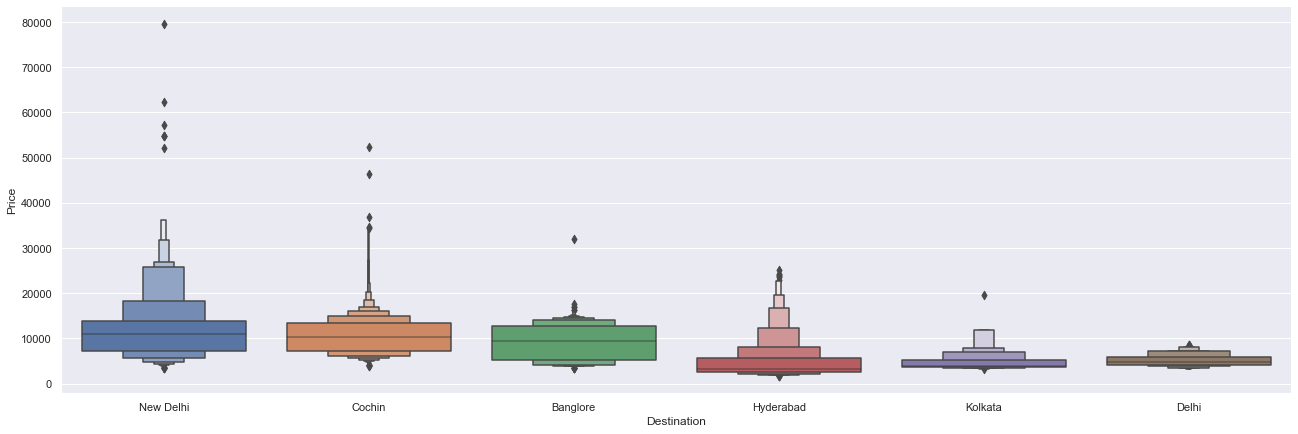

In [28]:
# Destination vs Price

sns.catplot(y = 'Price', x = 'Destination', data = train.sort_values('Price', ascending = False), kind='boxen', height = 6, aspect = 3)
plt.show()

In [29]:
# As this column is nominal categorical data we performe OneHotEncoding.
Destination = train[['Destination']]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [30]:
train.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [31]:
# Additional_Info contains about 80% no info.
# Route and Total stops give same info.

# so we drop Route and Additional_Info.
train.drop(['Route', 'Additional_Info'], axis = 1, inplace= True)

In [32]:
# This column is ordinal categorical type.
train.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [33]:
# This column is ordinal categorical type so we perform LabelEncoding.
# We assign values with corresponding keys.
train.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [34]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [35]:
# Concatenate dataframes ===> train + Airline + Source + Destination

train_data = pd.concat([train, Airline, Source, Destination], axis=1)

In [36]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
train_data.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace=True)

In [38]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [39]:
train_data.shape

(10682, 30)

## Test Set

In [40]:
# Importing Test dataset
test = pd.read_excel(r'test.xlsx')

In [41]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [42]:
# Preprocessing Test data
# checking values of duration column
test.Duration.value_counts()
test.isnull().sum()
'''Since very few null values are present we drop the nan rows'''
test.dropna(inplace = True)
test.isnull().sum()
# First we obtain day and month from Date_of_journey column and add a new column
test['Journey_day'] = pd.to_datetime(test.Date_of_Journey, format = '%d/%m/%Y').dt.day
test['Journey_month'] = pd.to_datetime(test.Date_of_Journey, format = '%d/%m/%Y').dt.month
test.shape
# We took all the necessary data from Date_of_Journey column so we drop this column
test.drop(['Date_of_Journey'], axis = 1 , inplace = True)
# Column Departure time is similar to date of journey so we can drop this column after taking necessary values

# Extracting hours
test['Dep_hour'] = pd.to_datetime(test.Dep_Time).dt.hour

# Extracting minutes
test['Dep_minutes'] = pd.to_datetime(test.Dep_Time).dt.minute

# Dropping Departure time
test.drop(['Dep_Time'], axis = 1, inplace = True)

test.shape
test.head()
#  Now looking at Arrival time we can extract hours and minutes since its time when plane pulls up to gate.

# Extracting hours.
test['Arrival_hour'] = pd.to_datetime(test.Arrival_Time).dt.hour

# Extracting minutes.
test['Arrival_minutes'] = pd.to_datetime(test.Arrival_Time).dt.minute

# Now we drop Arrival time.
test.drop(['Arrival_Time'], axis = 1, inplace = True)
test.head()
# Duration is diffrence between departure and arrival time.
# Also it is time taken by plane to reach destination.

# Assigning and converting duration column to list.
duration = list(test.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:       # Checking if duration contains only hour or min.
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m' # Adds 0 minutes.
        else:
            duration[i] = '0h ' + duration[i]         # Adds 0 hour.
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0])) #Extract hours from duration.
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1])) # Extract only minutes from duration.

# Adding Duration_hours and Duration_mins list to test dataframe
test['Duration_hours'] = duration_hours
test['Duration_minutes'] = duration_mins

# Now we drop Duration column.
test.drop(['Duration'], axis = 1, inplace = True)

# Airline column is nominal data.
test.Airline.value_counts()

# As this column is nominal categorical data we performe OneHotEncoding.
Airline = test.Airline

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

# Source column is nominal data.
test.Source.value_counts()

# As this column is nominal categorical data we performe OneHotEncoding.
Source = test[['Source']]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

# Destination column is nominal data.
test.Destination.value_counts()

# As this column is nominal categorical data we performe OneHotEncoding.
Destination = test[['Destination']]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

test.Route
# Additional_Info contains about 80% no info.
# Route and Total stops give same info.

# so we drop Route and Additional_Info.
test.drop(['Route', 'Additional_Info'], axis = 1, inplace= True)

# This column is ordinal categorical type.
test.Total_Stops.value_counts()

# This column is ordinal categorical type so we perform LabelEncoding.
# We assign values with corresponding keys.
test.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

test.head()

# Concatenate dataframes ===> test + Airline + Source + Destination

test = pd.concat([test, Airline, Source, Destination], axis=1)

test.head()

test.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace=True)

test.head()
test.shape

(2671, 28)

In [43]:
test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [44]:
train_data.shape

(10682, 30)

In [45]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [46]:
X = train_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
y = train_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

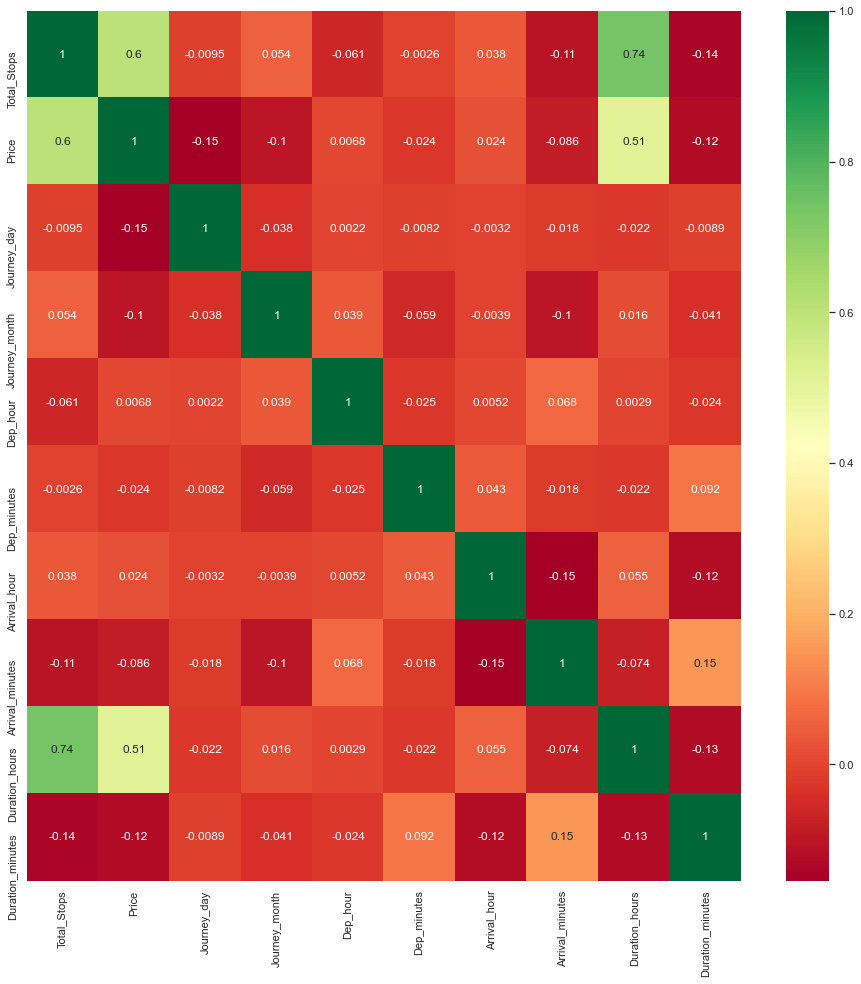

In [48]:
# Finding correlation between independent and dependent variable.
plt.figure(figsize = (16,16))
sns.heatmap(train.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [49]:
# Important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X, y)

ExtraTreesRegressor()

In [50]:
print(select.feature_importances_)

[2.51543591e-01 1.43951122e-01 5.34481262e-02 2.40045263e-02
 2.11609294e-02 2.80827799e-02 1.95766995e-02 1.03239782e-01
 1.75109803e-02 8.60949866e-03 2.04765999e-03 1.79701752e-02
 1.39544087e-01 6.70696542e-02 1.84651297e-02 8.85506249e-04
 3.40916303e-03 1.24817878e-04 5.16346894e-03 9.04684909e-05
 4.25006337e-04 9.15847072e-03 3.32484740e-03 5.46466588e-03
 1.04439912e-02 1.41243336e-02 5.88931602e-03 4.50497789e-04
 2.48207041e-02]


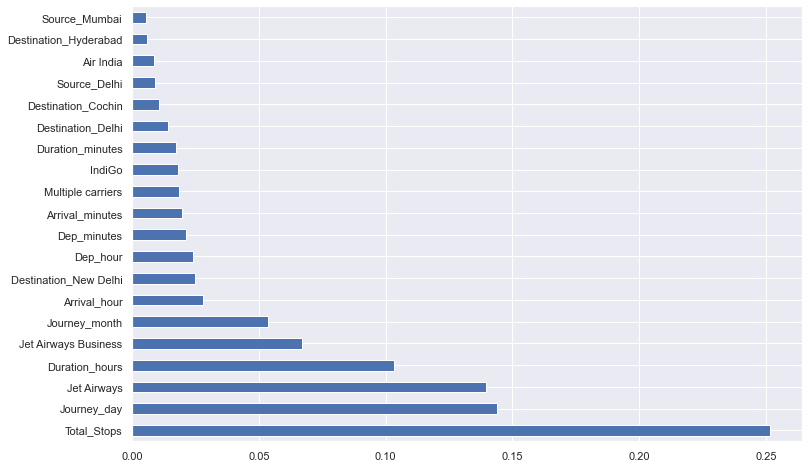

In [51]:
# Plot graph for important features.

plt.figure(figsize=(12, 8))
imp_features = pd.Series(select.feature_importances_, index=X.columns)
imp_features.nlargest(20).plot(kind = 'barh')
plt.show()

## Fitting model using Random Forest

In [52]:
# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [53]:
from sklearn.ensemble import RandomForestRegressor
reg_f = RandomForestRegressor()
reg_f.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
y_pred = reg_f.predict(X_test)

In [55]:
# Testing Score
reg_f.score(X_test, y_test)

0.8286223814124144

In [56]:
# Training score
reg_f.score(X_train, y_train)

0.9532709336709658

C:\ProgramData\Anaconda3\envs\flight\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


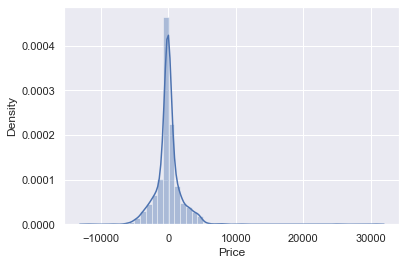

In [57]:
# We can see that it is forming gaussian bell showing results are good.
sns.distplot(y_test-y_pred)
plt.show()

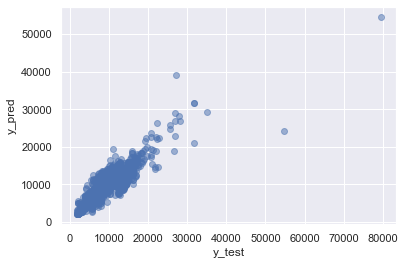

In [58]:
# Results scene through scatter plot.
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [59]:
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1173.6253058300822
MSE: 3902005.2533223885
RMSE: 1975.349400314382


In [61]:
# Checking R2 score
metrics.r2_score(y_test, y_pred)

0.8286223814124144

## Hyperparameter Tunning

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Randomized Search CV

# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node.
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node.
min_samples_leaf = [1, 2, 5, 10]

In [64]:
# Create the random grid.

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [65]:
# Random search of parameters, using 5 fold cross validation.
# search accross 100 diffrent  combnations.
rf_random = RandomizedSearchCV(estimator=reg_f, param_distributions=random_grid,
                               scoring='neg_mean_squared_error', 
                               n_iter=10, cv = 5, verbose=2,
                               random_state=5, n_jobs=1)

In [66]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=   4.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   3.7s
[CV] n_estimators=1000, min_sample

[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   3.5s
[CV] n_estimators=700, min_samples_split=5,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=5, scoring='neg_mean_squared_error', verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [68]:
prediction = rf_random.predict(X_test)

C:\ProgramData\Anaconda3\envs\flight\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


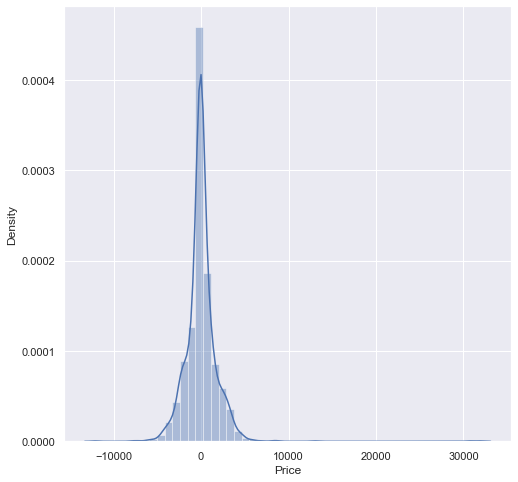

In [69]:
# It can be noted that it is gaussian bell curve.
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1127.6302444144253
MSE: 3612458.9146668375
RMSE: 1900.6469726561104


## Saving the model to reuse it.

In [71]:
import pickle
# open file where we want to store the data
file = open('flyprice_pred.pkl', 'wb')

In [72]:
# Dump info to that file
pickle.dump(rf_random, file)

In [73]:
model = open('flyprice_pred.pkl', 'rb')
forest = pickle.load(model)

In [74]:
y_prediction = forest.predict(X_test)

In [75]:
# Checking R2score
metrics.r2_score(y_test, y_prediction)

0.8413393714644631